# Model Definition and Evaluation
## Table of Contents
1. [Model Selection](#model-selection)
2. [Feature Engineering](#feature-engineering)
3. [Hyperparameter Tuning](#hyperparameter-tuning)
4. [Implementation](#implementation)
5. [Evaluation Metrics](#evaluation-metrics)
6. [Comparative Analysis](#comparative-analysis)


In [12]:
# Import necessary libraries
import tensorflow as tf
from keras import layers
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Input, Dense, BatchNormalization
from keras.src.optimizers import Adam
import tensorflow as tf
from keras import layers
import keras


## Data Preparation

In [17]:
# Beispiel Daten laden
data = pd.read_csv('./../data/preprocessed_df.csv') # Pfad zu Ihren Daten

data[np.isnan(data)] = 0.0

# Daten skalieren
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Dimension der Eingabedaten
input_dim = data_scaled.shape[1]

print(data_scaled[:5])

[[0.         0.         0.0030929  0.05263158 0.         0.10526316
  0.26315789 0.21052632 0.05263158 0.135      0.7440808  0.74566782
  0.06277255 0.53601451]
 [0.         0.33333333 0.00238009 0.47368421 0.26315789 0.21052632
  0.52631579 0.10526316 0.21052632 0.35375    0.70649122 0.71014102
  0.         0.31792393]
 [0.         0.66666667 0.00831226 1.         0.05263158 0.73684211
  0.84210526 0.89473684 0.15789474 0.72875    0.77876653 0.78222397
  0.20698158 0.35502628]
 [0.         1.         0.00371728 0.57894737 0.10526316 0.42105263
  0.52631579 0.15789474 0.21052632 0.395      0.82198233 0.8251407
  0.05533873 0.52209791]
 [0.02173913 0.         0.0042125  0.15789474 0.05263158 0.15789474
  0.10526316 0.15789474 0.10526316 0.145      0.23894266 0.23658067
  0.         0.26031593]]


In [14]:
# Berechnen Sie den Mittelwert und die Standardabweichung für jede Eigenschaft der skalierten Daten
means = np.mean(data_scaled, axis=0)
stds = np.std(data_scaled, axis=0)

# Anzahl der zu generierenden Datenpunkte
num_additional_points = 1000

# Generieren Sie zusätzliche skalierten Datenpunkte basierend auf den Mittelwerten und Standardabweichungen
synthetic_data_scaled = np.random.normal(loc=means, scale=stds, size=(num_additional_points, data_scaled.shape[1]))

# Die generierten Daten zurückskalieren auf den ursprünglichen Wertebereich
synthetic_data = scaler.inverse_transform(synthetic_data_scaled)

# Die generierten Daten mit den Originaldaten kombinieren
augmented_data = np.vstack((data, synthetic_data))

# Optional: Konvertieren Sie die Daten in ein TensorFlow-Dataset
dataset = tf.data.Dataset.from_tensor_slices(augmented_data)

print("Original Data Shape:", data.shape)
print("Synthetic Data Shape:", synthetic_data.shape)
print("Augmented Data Shape:", augmented_data.shape)

Original Data Shape: (188, 14)
Synthetic Data Shape: (1000, 14)
Augmented Data Shape: (1188, 14)


In [15]:

augmented_data = pd.DataFrame(augmented_data, columns=data.columns)
augmented_data.head()

,participant_id,test_id,test_duration,mental,physical,temporal,performance,effort,frustration,mean,mean_pupil_diameter,median_pupil_diameter,blinkrate,fixationrate
0,1.0,1.0,33.643950,10.0,5.0,15.0,25.0,25.0,10.0,15.0,43.855534,43.893976,0.059446,0.295946
1,1.0,2.0,28.484322,50.0,30.0,25.0,50.0,15.0,25.0,32.5,42.935538,43.021599,0.000000,0.175533
2,1.0,3.0,71.423823,100.0,10.0,75.0,80.0,90.0,20.0,62.5,44.704459,44.791630,0.196013,0.196018
3,1.0,4.0,38.163442,60.0,15.0,45.0,50.0,20.0,25.0,35.8,45.762156,45.845470,0.052406,0.288263
4,2.0,1.0,41.748047,20.0,10.0,20.0,10.0,20.0,15.0,15.8,31.492393,31.393101,0.000000,0.143727


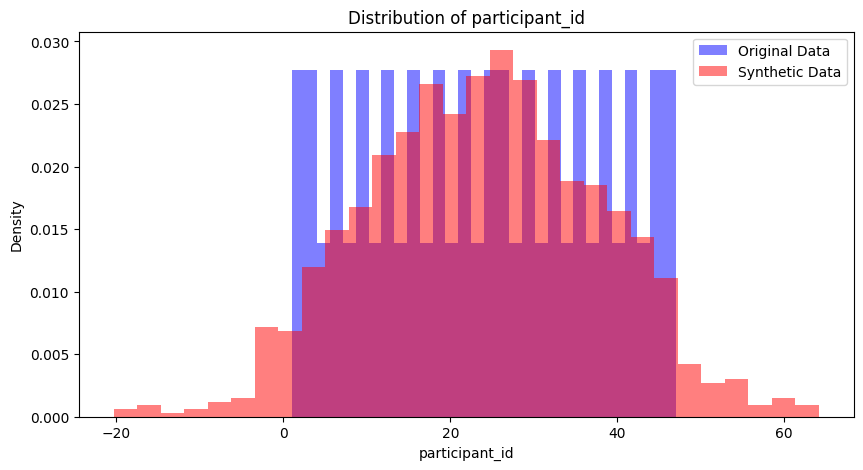

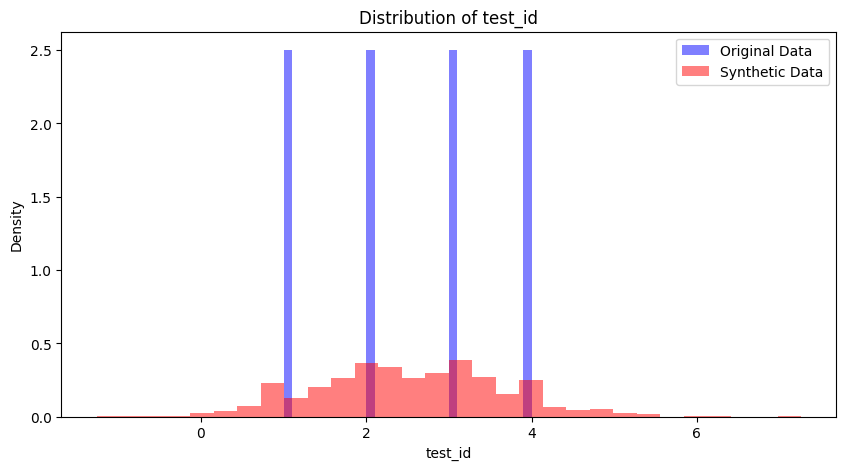

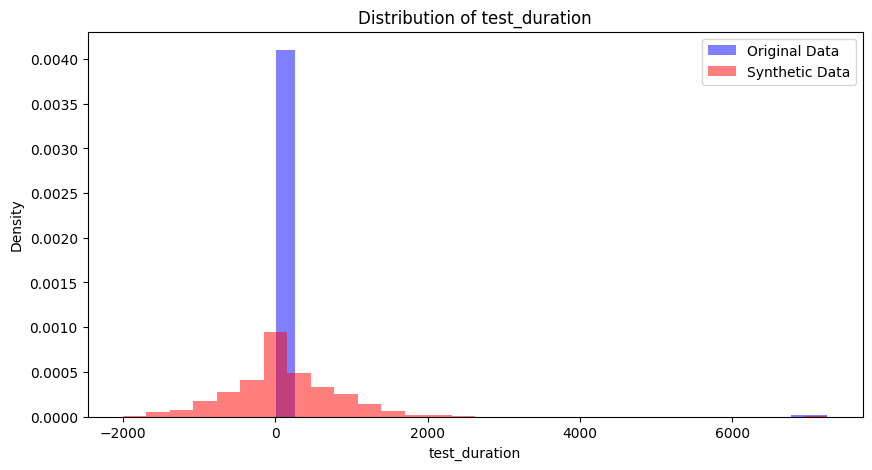

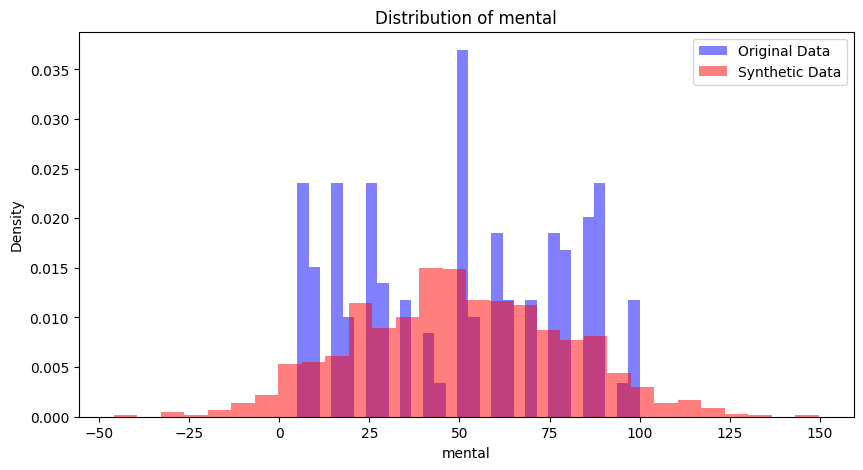

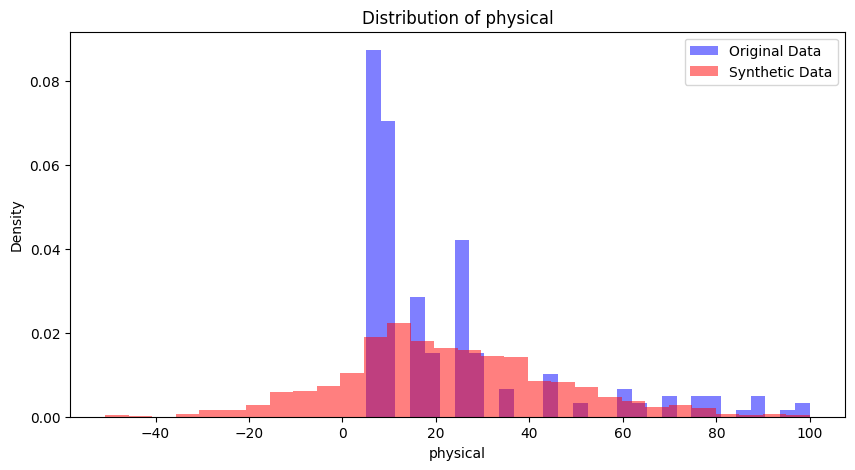

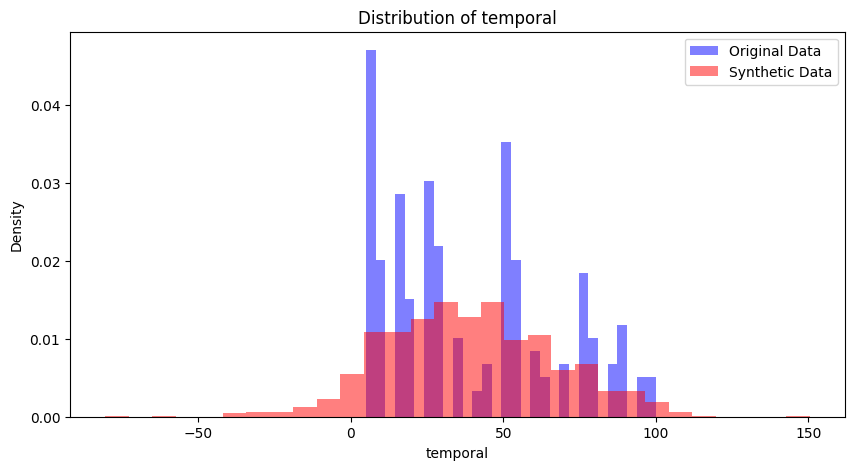

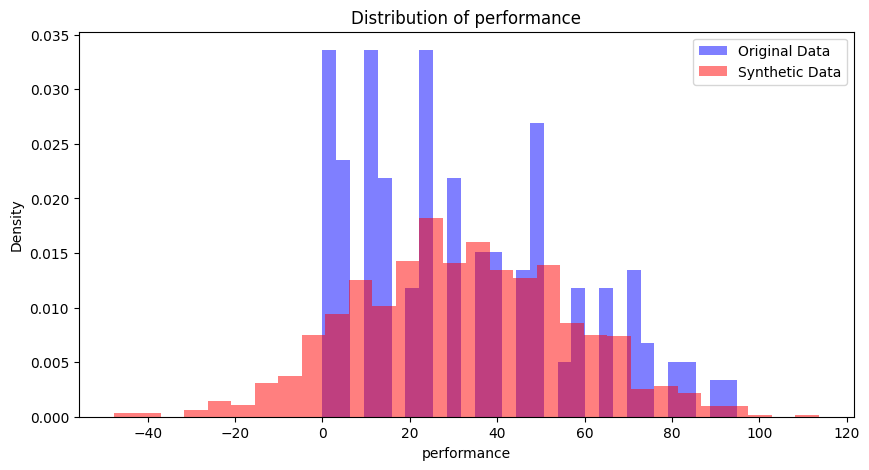

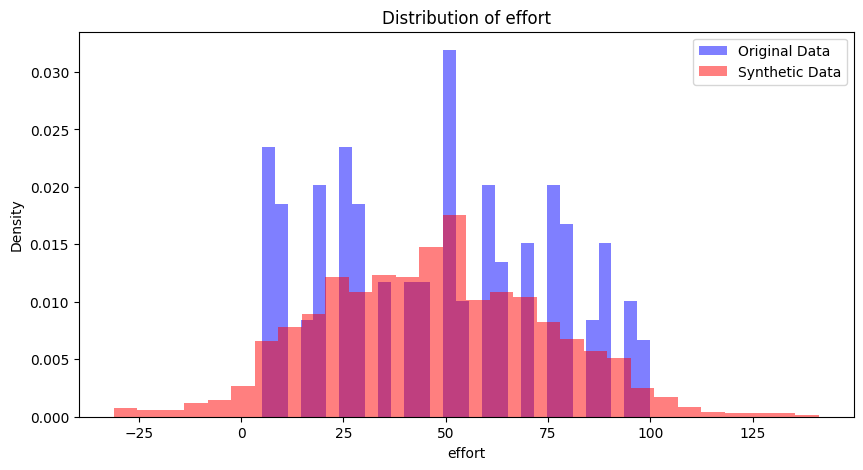

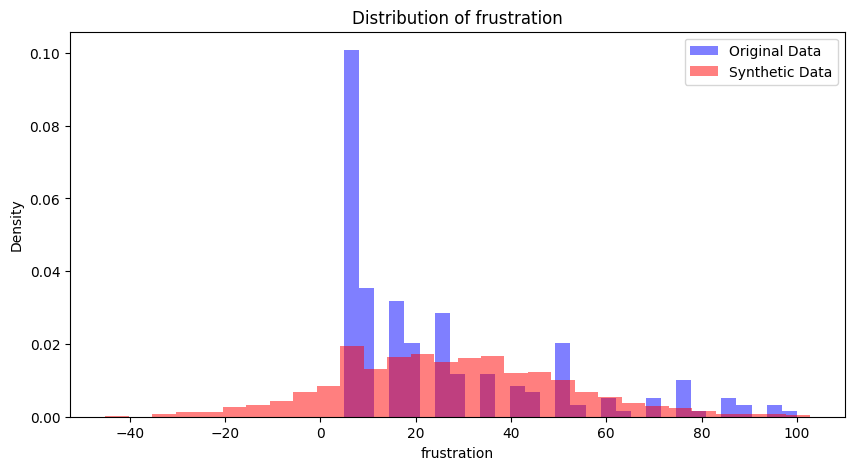

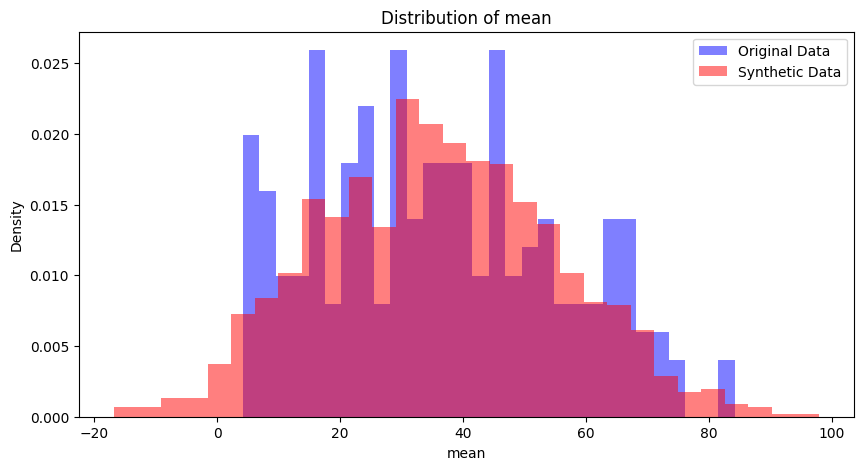

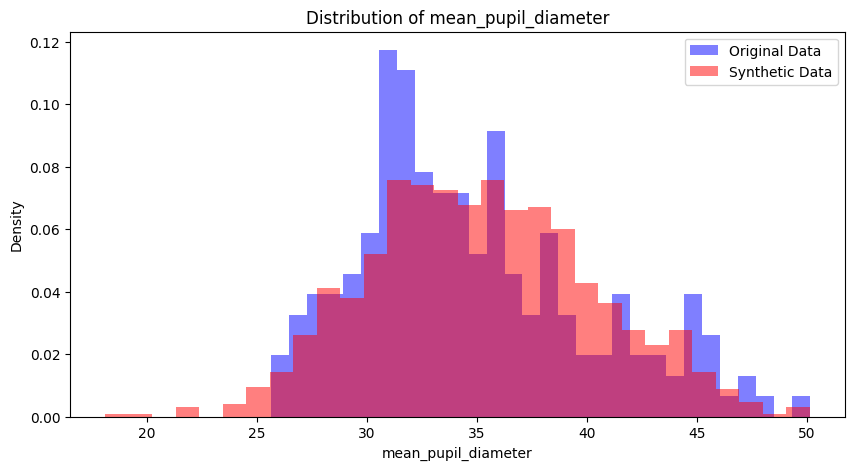

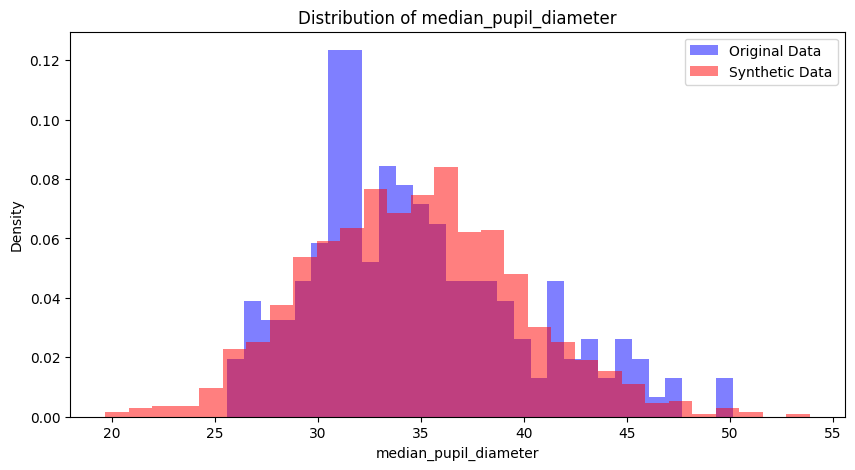

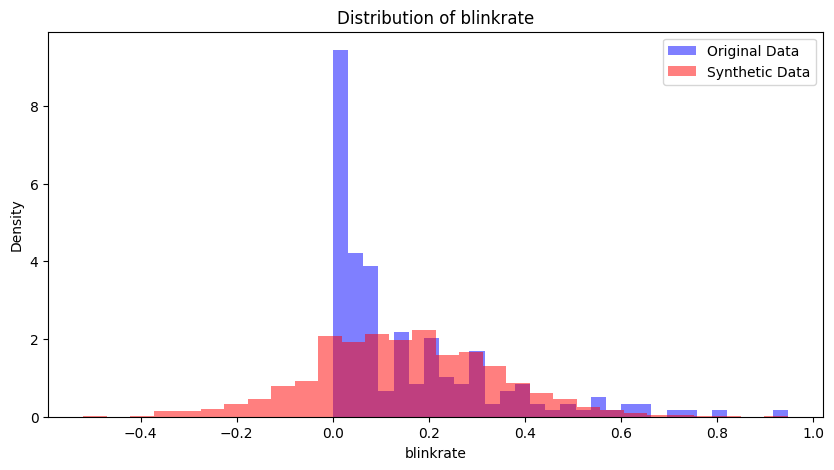

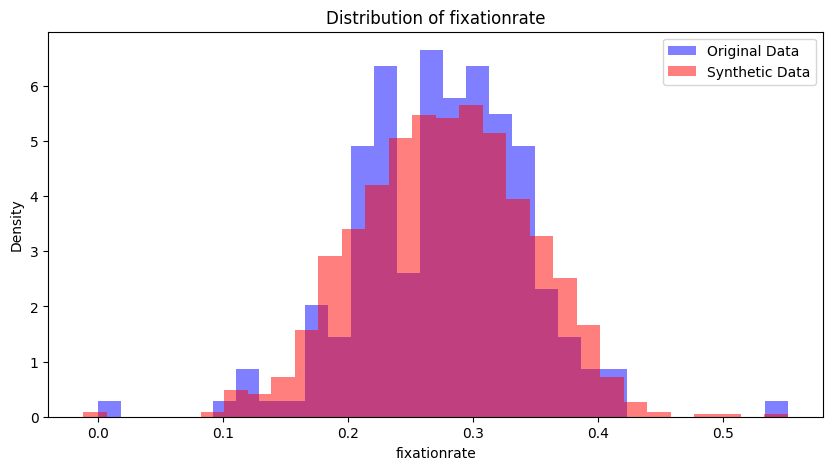

In [19]:
for column in data.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data[column], bins=30, alpha=0.5, label='Original Data', color='blue', density=True)
    plt.hist(augmented_data[column], bins=30, alpha=0.5, label='Synthetic Data', color='red', density=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [2]:
# TODO Remove unplausible data, e.g. data < 0